<a href="https://colab.research.google.com/github/nikunjsonule/hotel-booking-analysis/blob/main/Nikunj_Sonule_(Group)_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Context

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!

# Content

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

 **Why Hotel booking analysis is important ?**

Hotel data analytics refers to qualitative and quantitative processes and techniques used to enhance productivity, marketing strategies, occupancy rates, and yield. The hotel data is first extracted and then categorized to identify and analyze behavioral data and patterns. The techniques used can vary depending on the business requirements.
Analyzing booking patterns shows the demand trends which you can use to implement dynamic pricing.

Data is of two types: big and small, and both of these can be structured and unstructured. So, how do you use data to make better decisions for your hotel? The answer is hotel data analytics.
Data analytics opens doors to limitless opportunities. In this dynamically evolving hotel industry, data analytics is a powerful technology that can help hotel owners make relevant business decisions. 


# We will analysis some problem statement realted to customer hotel bookings 

We have divide the analysis part in four parts for easy understanding -

*   Booking analysis based on datasets available
*   Cancellation analysis
*   General analysis 
*   Analysis to understand for betterment of business perspective




# Firstly.....what we can do to understand

To understand the problem and analysis it we have to look firstly to dataset. Dataset shows how data is been represent in column and rows, so whenever we create variable we can use those column and data for analysis.

# The first step in EDA process is Data Preprocessing and Cleaning

**Import Packages**

First Import necessary packages and import the dataset

In [ ]:
!pip install pycountry

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pycountry as pc
import matplotlib.ticker as mtick
import plotly.express as px



     |████████████████████████████████| 10.1 MB 5.5 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=3df240c464f642c2f603a4c610a8d152849200a4953051288b2ca8a28f443028
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


Now importing and display the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing data and show first 5 rows
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/All project/EDA/Hotel Booking Analysis/Hotel Bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Columns in the datasets
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


First copy the dataset, so our original dataset remains unchanged

In [ ]:
# Using this data frame for all analysis
hotel_data_copy= data.copy()

In [ ]:
hotel_data_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Finding  number of null and missing values**

In [ ]:
#Find out the data type of each column 
hotel_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_data_copy.shape

(119390, 32)

In [ ]:
# droping unwanted columns 
hotel_data_copy.drop(['company','agent'], axis = 1,inplace = True)

In [ ]:
hotel_data_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Creating childs column from babies and children**

We can look after problem statement of adults and childs for analysis. So, we are adding new column named childs i.e merging both babies and children column.

In [ ]:
hotel_data_copy['childs'] = hotel_data_copy['babies'] + hotel_data_copy['children']

In [ ]:
hotel_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In the real world, data is never 100% percent perfect, 100% accurate, and 100% complete. By nature, data is full of errors: omissions, inconsistencies, and duplicates.
That’s why understanding the data quality process is important for many businesses trying to sort out their data.

In [ ]:
# Droping babies and children column as for further analysis we have taken childs column
# droping unwanted columns 
hotel_data_copy.drop(['babies','children'], axis = 1,inplace = True)

In [ ]:
hotel_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  meal                            119390 non-null  object 
 11  country                         118902 non-null  object 
 12  market_segment  

Now dataset contains 119390 columns and 29 rows

In [ ]:
hotel_data_copy.shape

(119390, 29)

Droping Duplicates from data set

In [ ]:
# drop duplicate values in data frame
hotel_data_copy = hotel_data_copy.drop_duplicates()


In [ ]:
hotel_data_copy.shape

(87369, 29)

Now we can find the missing values

In [ ]:
#check null values in Data frame
hotel_data_copy.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
meal                                0
country                           452
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_

In [ ]:
# Droping null values from the dataset
hotel_data_copy.dropna(inplace=True)

In [ ]:
# So after cleaning our datasets we have 86913 columns and 29 rows
hotel_data_copy.shape

(86913, 29)

After cleaning the datasets we have following columns for analysis

In [ ]:
hotel_data_copy.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'childs'],
      dtype='object')

# Analysis based on bookings 

**Analysis no. 1**

How many total bookings were made by both the resort and city hotels ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



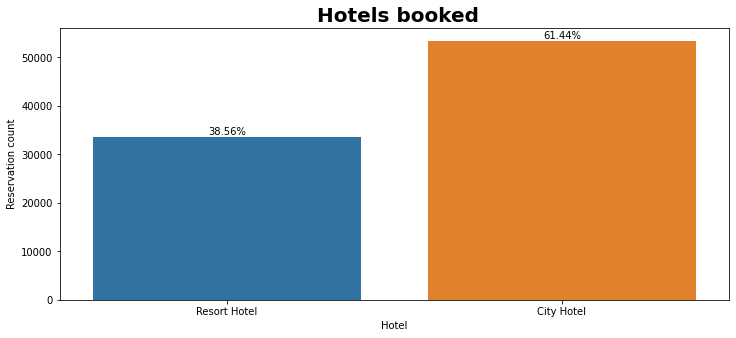

In [ ]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(hotel_data_copy['hotel'])
plt.title(' Hotels booked', weight='bold', size = 20)
plt.xlabel('Hotel', size = 10)
plt.ylabel('Reservation count', size = 10)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/hotel_data_copy.shape[0]*100),ha = "center")

The above bar chart shows that their are 61.44% and 38.56%, City Hotel and Resort Hotel are booked respectively. The reservation count of City Hotel is more as compared to Resort Hotel.

**Analysis no.2**

Analysis based on year wise bookings takes place

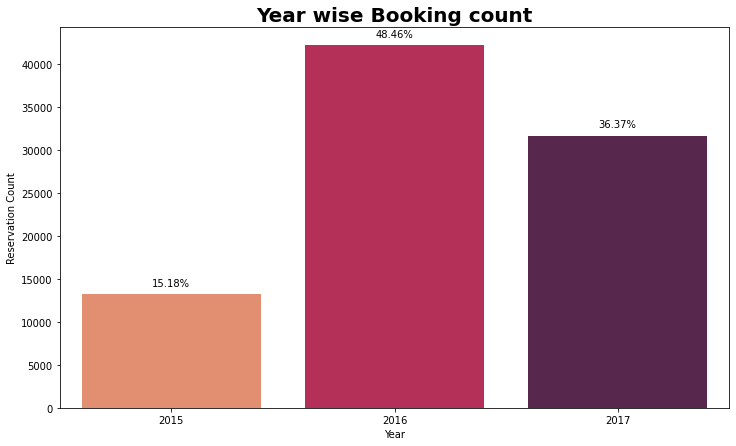

In [ ]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x=hotel_data_copy['arrival_date_year'], palette = 'rocket_r')
plt.title('Year wise Booking count', weight='bold',size = 20)
plt.xlabel('Year',size = 10)
plt.ylabel('Reservation Count',size = 10)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+ 1000, '{:1.2f}''%'.format(height/hotel_data_copy.shape[0]*100),ha = "center")

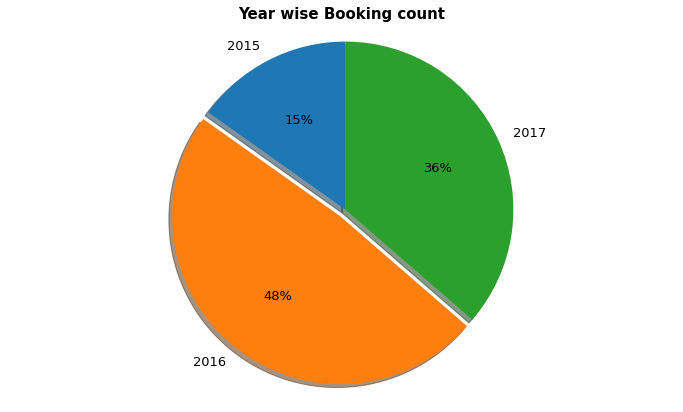

In [ ]:
fig, ax = plt.subplots(figsize = (12,7))

x = hotel_data_copy.groupby('arrival_date_year')['arrival_date_year'].count()
y = x.index.get_level_values(0)
explode = (0, 0.05, 0)
plt.title('Year wise Booking count', weight='bold',size = 15)

plt.pie(x, labels=y, explode = explode, autopct='%1.0f%%',shadow=True, startangle=90, textprops={'fontsize': 13})
plt.axis('equal')

plt.show()

In year wise booking 2016 is booked mostly by the customer with 48%, followed by 2017 with 36% and 2015 with 15%.

**Analysis no.3**

Which are the categories of room booked by customer ?

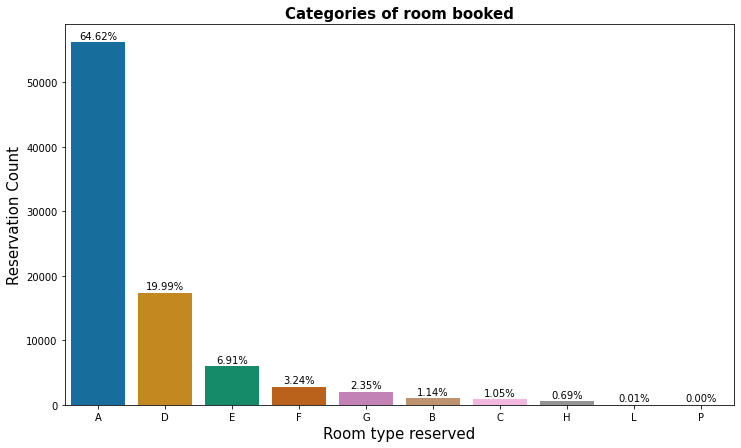

In [ ]:
fig, ax = plt.subplots(figsize = (12,7))


x = hotel_data_copy.groupby('reserved_room_type')['reserved_room_type'].count().sort_values(ascending=False)
y = x.index.get_level_values(0)

sns.barplot(x = y, y=x, palette = 'colorblind')
plt.title('Categories of room booked', weight='bold',size = 15)
plt.xlabel('Room type reserved',size = 15)
plt.ylabel('Reservation Count',size = 15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/hotel_data_copy.shape[0]*100),ha = "center")

The most preferable reserved room type is category A with 64.62%, followed by room type category D with 19.99% and E with 6.91%. All other have minimum rate from 3.24% of F, G with 2.35%, B with 1.14%, C with 1.05%, H with 0.69% and L with 0.01%

**Analysis no.4**

Through which market segment the customer have to wait more for confirming their booking ?

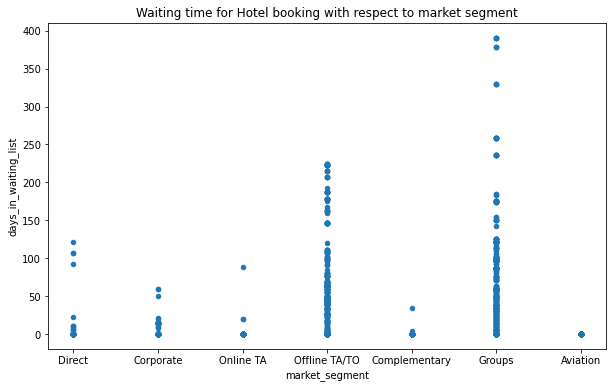

In [ ]:
#This is a scatter plot for Market segment and days_in_waiting_list 

hotel_data_copy.plot.scatter(x='market_segment', y = 'days_in_waiting_list' , figsize = (10,6), title = 'Waiting time for Hotel booking with respect to market segment' , xlabel = 'Market segment', ylabel = 'Days in waiting list')
plt.show()

The above plot is a scatter plot. Based on Market Segment we Observed that  waiting days for Groups are the highest and least for Aviation. Groups are the highest number of waiting days followed by Offline TA/TO of market segment with most number of waitings.



# Analysis based on Cancellation

**Analysis no.5**

Which were cancelled and non-cancelled bookings made by the customers ?

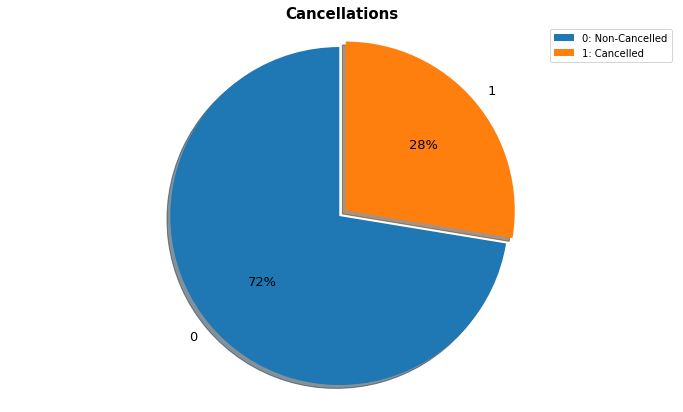

In [ ]:
fig, ax = plt.subplots(figsize = (12,7))

x = hotel_data_copy.groupby('is_canceled')['is_canceled'].count()
y = x.index.get_level_values(0)
explode = (0, 0.05)
plt.title('Cancellations', weight='bold', size = 15)
labels = [r'0: Non-Cancelled', r'1: Cancelled']

plt.pie(x, labels=y, explode = explode, autopct='%1.0f%%',shadow=True, startangle=90, textprops={'fontsize': 13})
plt.axis('equal')
plt.legend(labels, loc="best")

By Observing the above pie chart , we clearly get the conclusion that 28% of Booking were Cancelled ,and remaining 72% were Succesful (i.e Not- Cancelled). 
We have taken '0' for non-cancelled and '1' for cancellations.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Reservation Count')

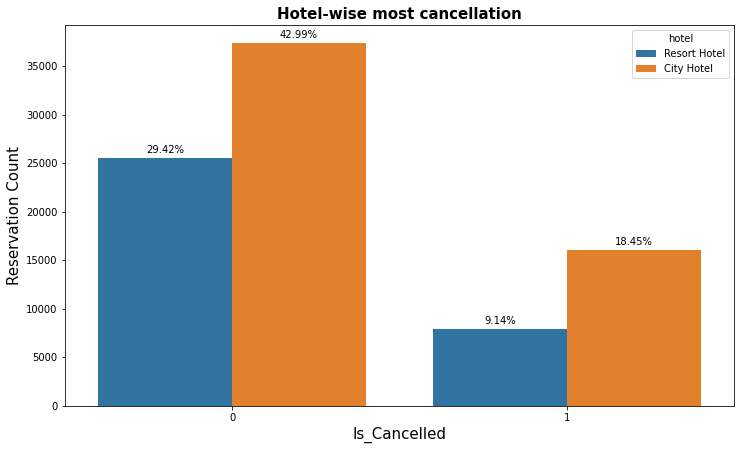

In [ ]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(hotel_data_copy['is_canceled'], hue = hotel_data_copy['hotel'] )

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/hotel_data_copy.shape[0]*100),ha = "center")  
plt.title('Hotel-wise most cancellation', weight='bold', size = 15)

plt.xlabel('Is_Cancelled', size = 15)
plt.ylabel('Reservation Count', size = 15)

When we Observe the hotel wise cancellation , we find that Reservation Count of 42.99% of City Hotel were Cancelled, and 29.42% were cancelled for Resort Hotels.
Also, there were no-cancellation of 9.14% and 18.45% of reservation count for City hotels and Resorts hotels.
Here '0' is for non-cancellation and '1' is for cancellation.


**Analysis no.6**

Impact of lead time on cancellation

Text(0, 0.5, 'Lead_time')

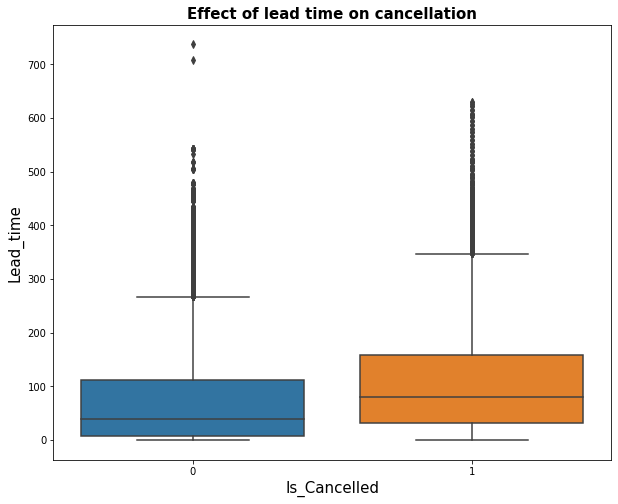

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))

sns.boxplot(y = hotel_data_copy["lead_time"], x = hotel_data_copy['is_canceled'])
plt.title('Effect of lead time on cancellation', weight='bold',size= 15)
plt.xlabel('Is_Cancelled',size = 15)
plt.ylabel('Lead_time',size = 15)



 The image above is a boxplot. A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

 Lead time is the time that elapsed between the day when the booking were made and the actual day of checking in. from the box plot it seems that the cancellation normally occurs soon after booking. the chances of cancellation are actually less if sufficient time has elapsed after booking. There may be many reason for this including hotel cancellation policies among many others and this is true for both type of hotels.

*   For non-cancellation the plot varies between 0(mimimum) to 280(maximum) and Q1 And Q3 for that is 1 - 110. Also, median is 30.
*   For cancellation the plot varies between 0(mimimum) to 350(maximum) and Q1 And Q3 for that is 30 - 175. Also, median is 80.








/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(26.95329861111111, 0.5, 'Lead_time')

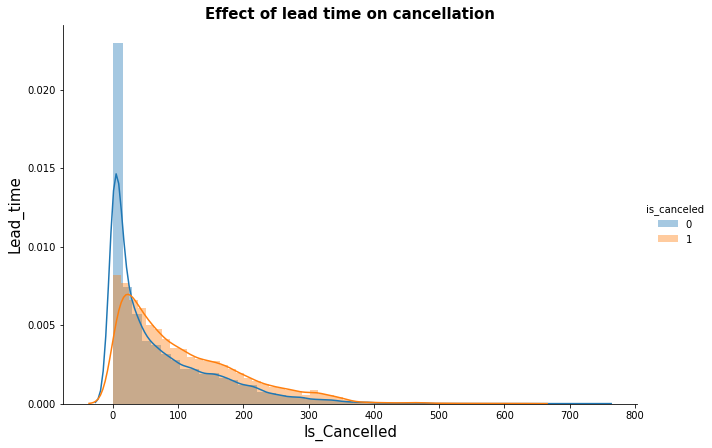

In [ ]:

sns.FacetGrid(hotel_data_copy, hue="is_canceled", height = 6,aspect=1.5) \
   .map(sns.distplot, "lead_time") \
   .add_legend();
plt.title('Effect of lead time on cancellation', weight='bold',size = 15)
plt.xlabel('Is_Cancelled',size = 15)
plt.ylabel('Lead_time',size = 15)

 Dist plots helps us to check the distribuiton of the column feature. Basically it shows the distribution of a univariate set of observations.
 The lead time of non-cancelled i.e '0' is higher efficiency as compared to cancellation of the booking. The KDE (Kernel Density Estimation) shows the probabality density function is higher of non- cancelled but in cancellation the KDE lead time lie between 0.005 to 0.010.  

**Analysis no. 7**

Cancellation percentage by year

Text(0, 0.5, 'cancellation percentage')

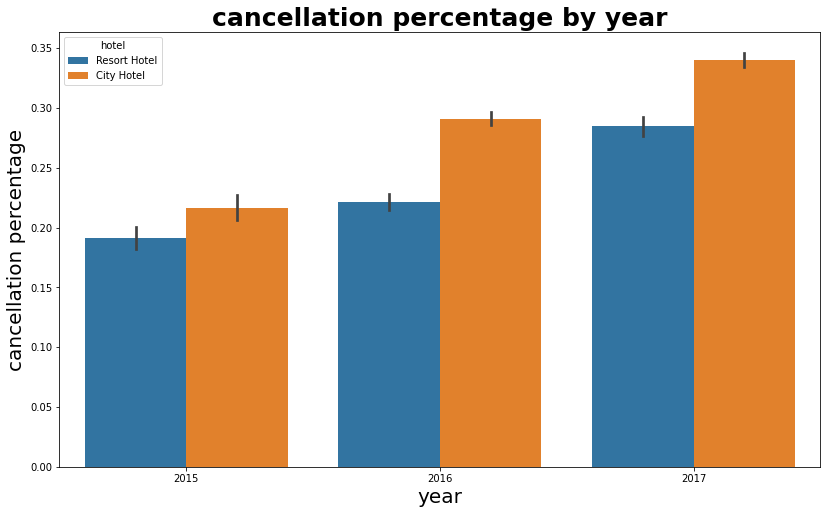

In [ ]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)

sns.barplot(data = hotel_data_copy, x= 'arrival_date_year', y = 'is_canceled',hue = 'hotel' )
plt.title('cancellation percentage by year',fontweight="bold", size=25)

plt.xlabel('year',size=20)
plt.ylabel('cancellation percentage',size=20)

Above Graph Describe the cancellation of Hotel year wise where we notice that in the year 2017 there are the most no. of cancellation of both resort and city hotel, followed by the year 2016, and lastly the year 2015 with the least no. of cancellations among the 3 years.

**Analysis no.8**

Which month have highest number of cancellation ?

In [ ]:

hotel_data_copy[hotel_data_copy['is_canceled'] == 1]['arrival_date_month'].value_counts()

August       3616
July         3192
May          2442
April        2404
June         2352
March        1829
October      1637
September    1636
February     1414
December     1373
November     1051
January      1037
Name: arrival_date_month, dtype: int64

Text(0, 0.5, 'number_of_cancelation')

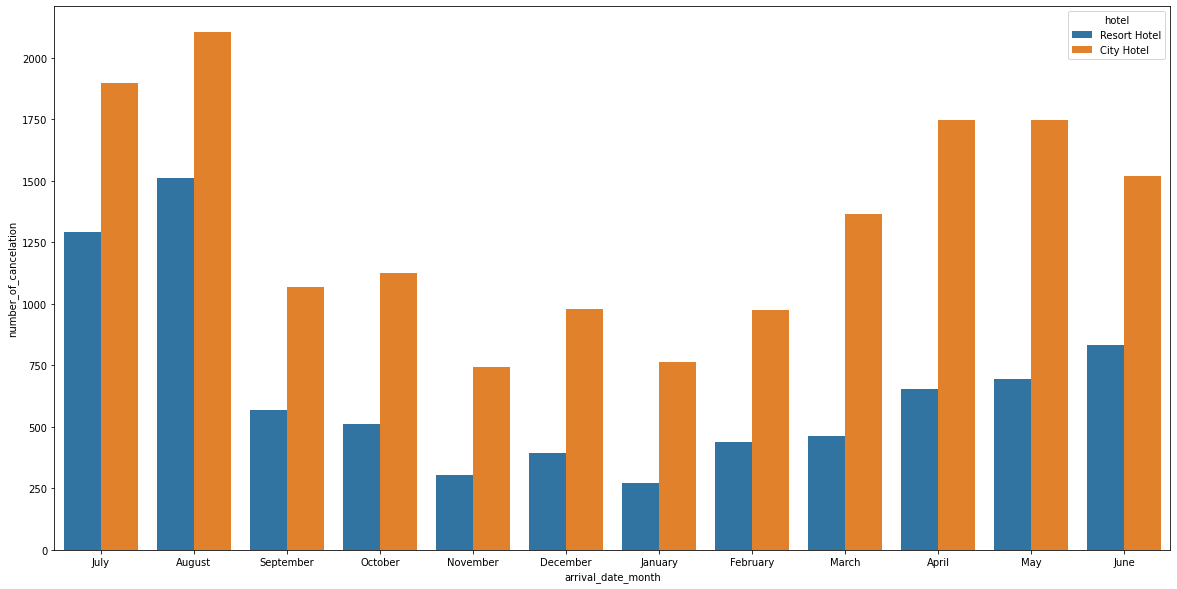

In [ ]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = 'arrival_date_month',hue = 'hotel', data = hotel_data_copy[hotel_data_copy['is_canceled'] == 1])
ax.set_ylabel('number_of_cancelation')

In this graph we found the cancellation with respect to months.

Comparetively to City Hotels , Resort Hotels has less no. of Cancellations.

CITY HOTEL CANCELLATIONS 

*   August month has the highest no. of cancellations (i.e it is more that 2000 cancellation).
*   Followed by July, April, May, June, March, October, September, December and February.
*   And the least no. of cancellations are made in the month of november and january (i.e which are approx. about 750 cancellations).








RESORT HOTEL CANCELLATIONS

*   August month has the highest no. of cancellations (i.e it is more that 1500 cancellation).
*   Followed by July, June , May, April, September, October,March ,February and December.
*   And, the least no. of cancellations are made in the month of november and january (i.e which are approx. between 250-350 cancellations).





**Analysis no.9**

How deposit varies in terms of non-cancellation

Text(0, 0.5, 'Non-Cancellations [%]')

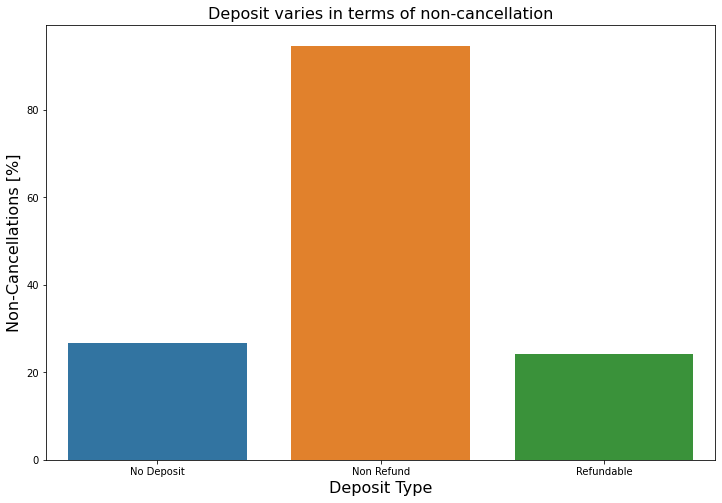

In [ ]:

deposit_df = hotel_data_copy.groupby('deposit_type')['is_canceled'].describe()
plt.figure(figsize=(12, 8))
sns.barplot(x=deposit_df.index, y=deposit_df["mean"].values * 100)
plt.title("Deposit varies in terms of non-cancellation", fontsize=16)
plt.xlabel("Deposit Type", fontsize=16)
plt.ylabel("Non-Cancellations [%]", fontsize=16)

In the Above Graph,

*   More than 80% of non - cancellation are non-refundable.
*   Also, we see that  20-25% are refundable
*   While approx. 30% people haven't deposit any money while booking.




# General Analysis 

**Analysis no. 10**

How much does guest pay for a room per night ?

In [ ]:
hotel_data_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,childs
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0


In [ ]:
#creating new dataframe so we can do our anlaysis non cancelled room only

room_type_category = hotel_data_copy[hotel_data_copy['is_canceled']==0]

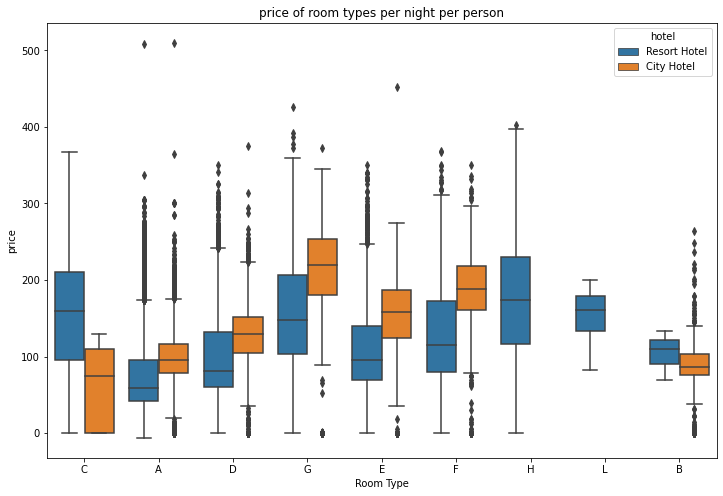

In [ ]:
#ploting box plot fro analysis

plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type', y ='adr',data = room_type_category,hue='hotel')
plt.title('price of room types per night per person')
plt.xlabel('Room Type')
plt.ylabel('price')
plt.show()

We can see in the above figure that with repect to "A" category room it has highest price appox as outlier

whereas with respect to 'G' category room of city hotel are much costlier than other

**Analysis no. 11**

Which are the most busy month ?

Text(0.5, 1.0, 'Graph showing number of arrival per month')

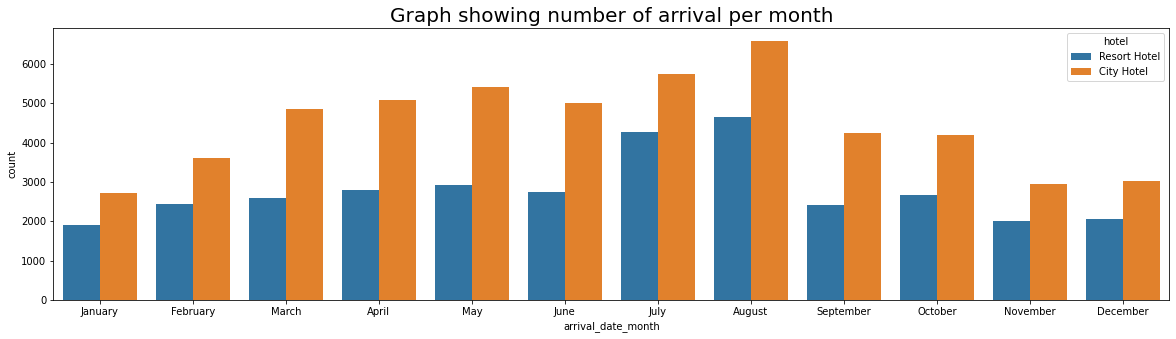

In [ ]:
plt.figure(figsize=(20,5))

sns.countplot(data = hotel_data_copy, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)

According to the above graph the most busy month is August



**Analysis no. 12**

Which meals were most preferrable to the customer ?

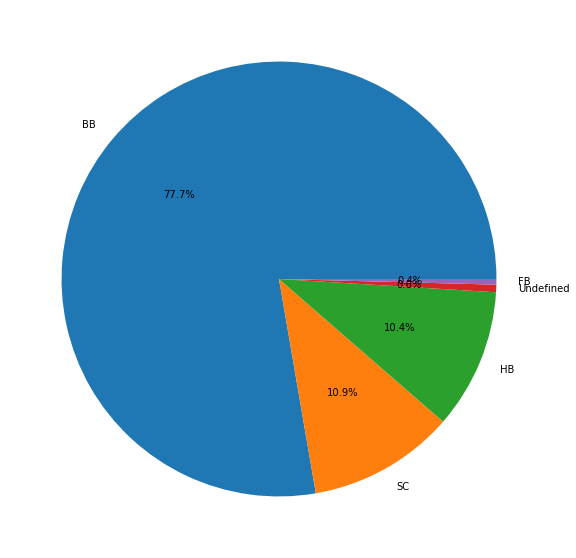

In [ ]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 10,10

#Making list of  not cancelled
# Assigning labels and converting them to list 

labels = hotel_data_copy['meal'].value_counts().index

# Assigning sizes and converting to list

sizes = hotel_data_copy['meal'].value_counts().tolist()

# Autopct enables you to display the percent value using python string formatting. .1f% will round off to the tenth place
plt.pie(sizes,labels=labels,autopct='%0.1f%%')
plt.show()


We can see from above pie chart that most preferrable meal is BB(77.4% appx) i.e Bed and Breakfast

**Analysis no. 13**

How long does guest stay at hotel on weekends and weekdays ?


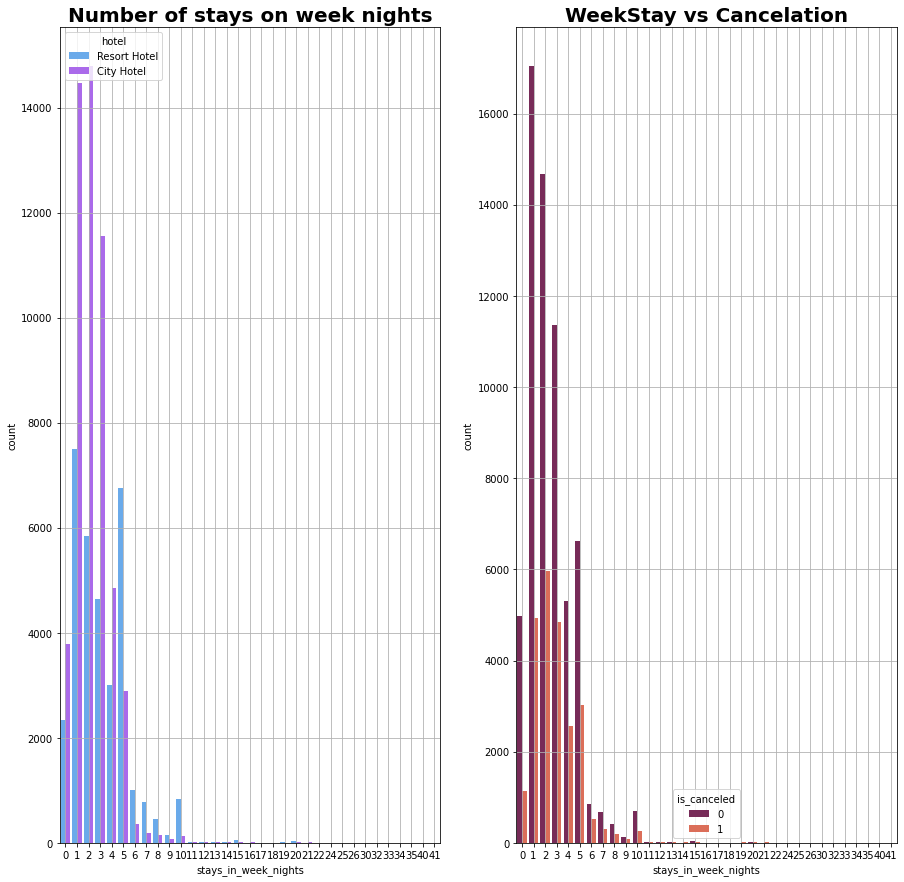

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
sns.countplot(data = hotel_data_copy, x = 'stays_in_week_nights',hue='hotel' ,palette='cool')
plt.title("Number of stays on week nights",fontweight="bold", size=20)
plt.grid()

plt.subplot(1, 2, 2)
sns.countplot(data = hotel_data_copy, x = 'stays_in_week_nights', hue='is_canceled', palette='rocket')
plt.title('WeekStay vs Cancelation',fontweight="bold", size=20)
plt.grid()

plt.show()

We can see from graph that most people are staying at hotel for 2 nights in week days

And second graph is showing that most cancellation is done for room which is booked for 2 night stay and we also see that most booking were not cancelled for 1 night stay

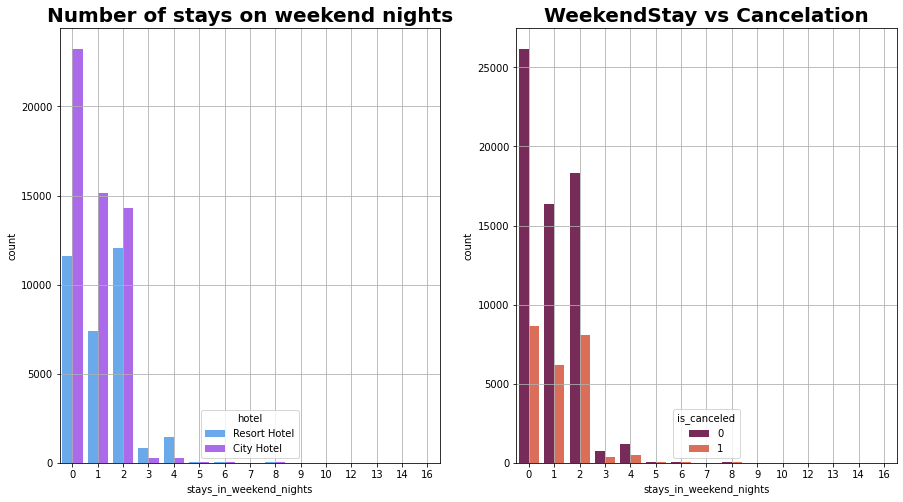

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(data = hotel_data_copy, x = 'stays_in_weekend_nights',hue='hotel' ,palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.grid()

plt.subplot(1, 2, 2)
sns.countplot(data = hotel_data_copy, x = 'stays_in_weekend_nights', hue='is_canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=20)
plt.grid()

plt.show()

More number People prefer to stay at city hotel in weekend for 0,1 and 2 nights

People staying for more than 2 night prefer to stay in Resort hotel

In next graph we can see that we have less number of cancellation of booking for weekends

**Analysis no. 14**

How many adults and childs guests arrived per month in each hotels?

In [ ]:
#Total bookings
total_bookings = hotel_data_copy.groupby(['hotel','arrival_date_month'])['adults','childs'].sum().reset_index()
total_bookings

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,hotel,arrival_date_month,adults,childs
0,City Hotel,April,9805,785.0
1,City Hotel,August,13188,1532.0
2,City Hotel,December,5688,522.0
3,City Hotel,February,6576,518.0
4,City Hotel,January,4801,333.0
5,City Hotel,July,11535,1201.0
6,City Hotel,June,9447,575.0
7,City Hotel,March,8989,462.0
8,City Hotel,May,9993,493.0
9,City Hotel,November,4999,182.0


In [ ]:
# Only Resort bookings
resort = total_bookings.loc[(total_bookings["hotel"] == "Resort Hotel")]
# Sort arrival date month column by month wise
resort['arrival_date_month'] = pd.Categorical(resort['arrival_date_month'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
resort.sort_values(by = 'arrival_date_month',inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print(resort['adults'].max())
print(resort['childs'].max())

9463
1400.0


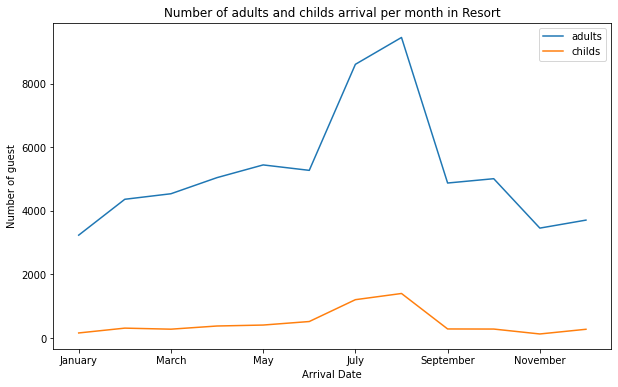

In [ ]:
#Line plot for finding the number of adults and kids -Resort hotel
resort.plot(x = 'arrival_date_month',y= ['adults','childs'],figsize=(10, 6), title = 'Number of adults and childs arrival per month in Resort', xlabel = 'Arrival Date', ylabel = 'Number of guest');

Based on the line chart the adults are highly recommend to visit in the Resort Hotel, right from June month to August we have highest number of Adults. 
The childs are least to visit in Resort Hotel with their family. Throughout all the months the number of childs are normal according to data but from June month to August month the guest number of childs are increasing gradually.  

# Business Perspective problem statement

**Analysis no. 15**

Booking and cancellation per market segment ?

Text(0.5, 1.0, 'Deposit Type for Market Segment')

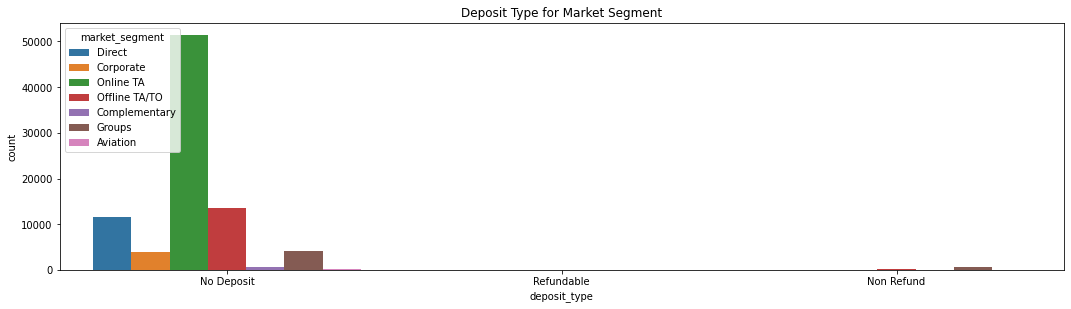

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(211)
sns.countplot(data=hotel_data_copy,x='deposit_type',hue='market_segment')
plt.title('Deposit Type for Market Segment')


We can see from above graph 1 that most the bookings are done through Online TA segment.

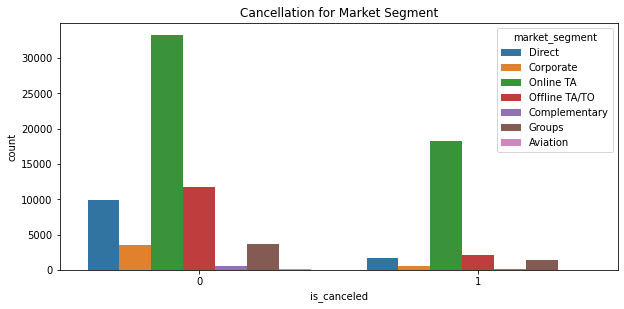

In [ ]:
plt.subplot(212)
sns.countplot(data=hotel_data_copy,x='is_canceled',hue='market_segment')
plt.title('Cancellation for Market Segment')
plt.show()

The above graph shows that most cancellation is also done through online TA segment only. So it precise clearly more about online TA to look up to market segment.

**Analysis no. 16**

Lets see how ADR(average daily rate) change over year, so that we can understand hotel industry is growing by renting their room.



Higher the ADR or rising ADR mean hotel is making money through renting , we can see in this bar plot that revenue generated by hotel industry is increasing year by year and also we can say that for each year the revenue is increasing till August month and after August the revenue is decreasing

In [ ]:
# doing groupby operation to find average ADR for each year by hotel wise
mean_adr_of_resort_city_hotel=hotel_data_copy.groupby(['hotel','arrival_date_year'])['adr'].mean().unstack()

Text(0, 0.5, 'MEAN ADR')

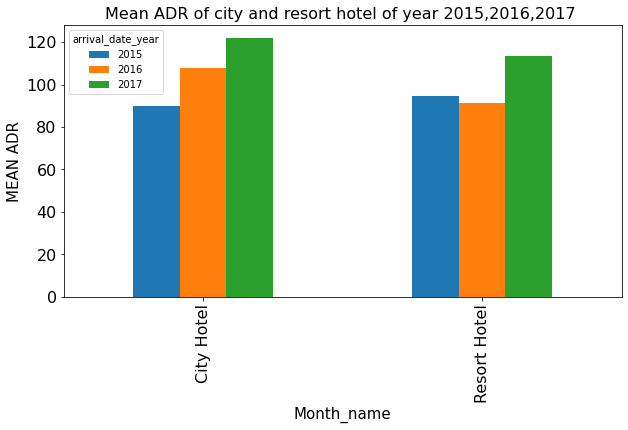

In [ ]:
# plotting bar plot for both hotels mean average daily rate by year wise
ax=mean_adr_of_resort_city_hotel.plot.bar(figsize=(10,5),fontsize=16)
ax.set_title('Mean ADR of city and resort hotel of year 2015,2016,2017 ',fontsize=16)
ax.set_xlabel('Month_name',fontsize=15)
ax.set_ylabel('MEAN ADR',fontsize=15)

In city hotel the growth in average daily rate is increasing year by year ,its mean that the hotel is growing their revenue year by year by renting room. In resort hotel also if we talk about year 2015 and year 2017 then growth is visible in bar chart.

**Analysis no. 17**

Which is the most preferred business segment ?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



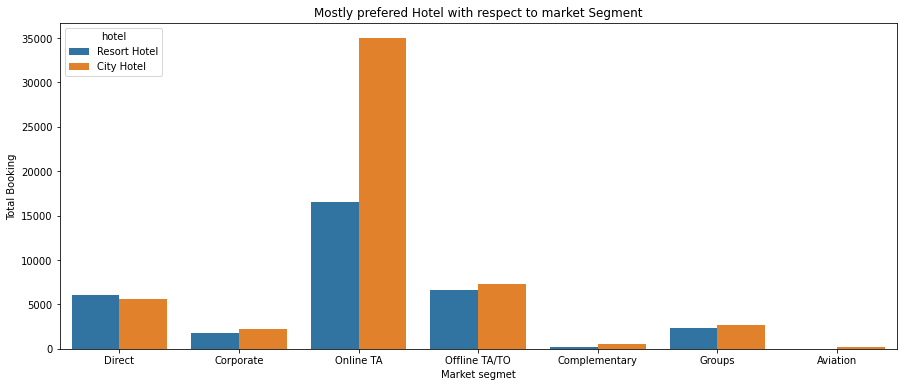

In [ ]:
# This is a Count plot for finding most prefered market segment 
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(hotel_data_copy.market_segment,hue= hotel_data_copy.hotel,ax=ax).set(title = 'Mostly prefered Hotel with respect to market Segment', xlabel = 'Market segmet' , ylabel ='Total Booking');

In the above graph , we observe that

*   Online TA , has most no. of hotel Bookings, where they Mostly prefer City Hotel over Resort Hotel. (i.e booking done for City Hotel is almost 35000 & for Resort hotel it is almost half i.e 16000 bookings)
*   Followed by Offline TA/TO  Where they also slightly prefer city Hotel more than Resort Hotel.
*   Then Comes in line the Direct Market Segment and they prefer Resort hotel than City hotel.
*   Later inline we have Groups, Corporate And Complementary Market Segments where they all slightly prefer city hotel over resort hotel.
*   last in the line we have Aviation market segment where they only prefer city Hotel.







In [ ]:
hotel_data_copy.shape

(86913, 29)

For both type of hotel, customer prefer 'online TA' segment for booking

In [ ]:
# Total booking done by Online TA
hotel_data_copy.loc[hotel_data_copy['market_segment']=='Online TA'].hotel.value_counts()

City Hotel      34984
Resort Hotel    16549
Name: hotel, dtype: int64

# Conclusion

That's how we have accomplished our team work in Hotel Booking Analysis project.

Throughout the project we learn many new things right from taking problem statement to understand the technical side of a product to analysis. We deal with missing data and outliers, we tested some of the fundamental statistical assumptions. Python has helped a lot to understand with libraries. 

 To deal with those data was really fun with many different analysis. Data cleaning and dealing with duplicate value was also most important to deal with correct methodology. Understand the dataset and predicting the solution of the problem from team work was also great big task. 

 Hotel Booking Analysis helps hotel industry for marketing strategy, building customer loyalty, and enhancing productivity. It enables hotels to personalize experiences for their guests, introduce better hotel pricing strategies, and expand their customer base. It makes positive industry because -

- Customer Data Analysis & Market Segmentation
- Real-Time Data and Hotel Pricing Strategies
- Managing Hotel Booking Channels
and many more we can do to scale up in hotel industry.

While working in the exploratory data analysis with team also helps us to work in team collaboration that shows how we should approach and divide a task. Maintaining a discipline in the task and precise to every point what we conclude.